# Various Hypothesis

## Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from scipy import stats
import scipy


In [2]:
basics = pd.read_csv('Data/final_basics.csv.gz',low_memory = False)
akas = pd.read_csv('Data/final_akas.csv.gz',low_memory = False)
ratings = pd.read_csv('Data/final_ratings.csv.gz', low_memory = False)
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)

# Question 1
 - Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [3]:
tmdb_df = pd.concat([year_2000, year_2001])
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2545 entries, 0 to 1315
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2545 non-null   object 
 1   adult                  2543 non-null   float64
 2   backdrop_path          1373 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2543 non-null   float64
 5   genres                 2543 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2543 non-null   float64
 8   original_language      2543 non-null   object 
 9   original_title         2543 non-null   object 
 10  overview               2492 non-null   object 
 11  popularity             2543 non-null   float64
 12  poster_path            2285 non-null   object 
 13  production_companies   2543 non-null   object 
 14  production_countries   2543 non-null   object 
 15  rele

In [4]:
df = tmdb_df.dropna(subset=['certification','revenue'])
df = df.set_index('imdb_id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, tt0118694 to tt8795764
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  809 non-null    float64
 1   backdrop_path          618 non-null    object 
 2   belongs_to_collection  108 non-null    object 
 3   budget                 809 non-null    float64
 4   genres                 809 non-null    object 
 5   homepage               91 non-null     object 
 6   id                     809 non-null    float64
 7   original_language      809 non-null    object 
 8   original_title         809 non-null    object 
 9   overview               809 non-null    object 
 10  popularity             809 non-null    float64
 11  poster_path            780 non-null    object 
 12  production_companies   809 non-null    object 
 13  production_countries   809 non-null    object 
 14  release_date           809 non-null    object 
 1

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2172.0,PG
tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.80,49.0,R
tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,Upon discovery of a shard of what could be the...,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.07,178.0,R
tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,Study hard.,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.00,0.0,R
tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.50,44.0,R


## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the rating of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the rating of a movie.  

## Determine the Correct Test to Perform
- Numerical Data
- More than 2
- ANOVA Test

In [5]:
df['certification'].value_counts()

R          459
PG-13      183
NR          73
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [6]:
df = df[df.revenue !=0]

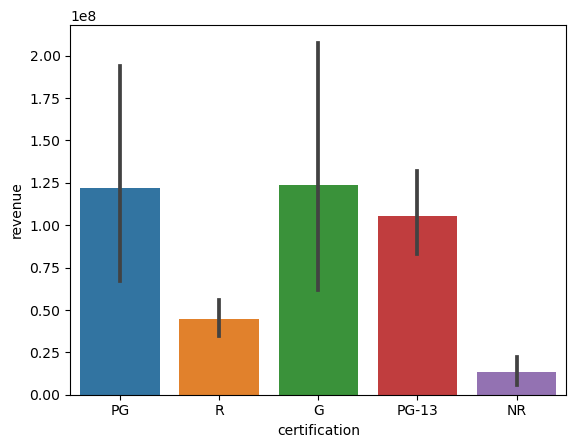

In [7]:
ax = sns.barplot(data=df, x='certification', y='revenue')

In [8]:
needed_cols = ['certification', 'revenue']
df[needed_cols]

,certification,revenue
imdb_id,,
tt0118694,PG,12854953.0
tt0120467,R,14904.0
tt0120630,G,224834564.0
tt0120753,R,105983.0
tt0120755,PG-13,546388105.0
...,...,...
tt0286751,R,318451.0
tt0287635,PG,28023563.0
tt0290332,PG,10229331.0


In [9]:
groups = {}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR'])

## Testing Assumptions
- No Significant Outliers
- Normality
- Equal Variance

### Checking Assumption of No Significant Outliers

In [10]:
for certification, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'There were {outliers.sum()} outliers in the {certification} group.')
    data = data.loc[~outliers]
    groups[certification] = data

There were 1 outliers in the PG group.
There were 5 outliers in the R group.
There were 1 outliers in the G group.
There were 2 outliers in the PG-13 group.
There were 0 outliers in the NR group.


### Checking Normality

In [11]:
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\james\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\james\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,group,n,pval,sig?
0,PG,31,4.044377e-05,True
1,R,163,1.802441e-14,True
2,G,13,3.648793e-01,False
3,PG-13,121,1.327067e-09,True
4,NR,12,2.440801e-01,False


- PG, R, PG-13 all have normal distribution
- G and NR fail to meet normality

### Test for Equal Variances

In [12]:
result = stats.levene(*groups.values())
result

LeveneResult(statistic=8.47344846108848, pvalue=1.5980984465059451e-06)

In [13]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We have failed to meet the assumption of normality and failed to meet the assumption of equal variance.
We wanted to run an ANOVA test but will run a Kurskal-Wallis test.

## Final Hypothesis: Kurskal-Wallis

In [14]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<0.05

KruskalResult(statistic=48.11536460789059, pvalue=8.929398945692642e-10)


True

- Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that there is a significant difference between revenue and the movie certifications. 

# Question 2
- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)? 

## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the runtime of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the runtime of a movie. 

## Determine the Correct Test to Perform
- Numeric Data
- Two groups/samples
- We want to run a 2-Sample T-Test

In [15]:
df['runtime'].value_counts()

106.0    13
95.0     13
90.0     12
99.0     11
104.0    10
         ..
74.0      1
199.0     1
165.0     1
141.0     1
172.0     1
Name: runtime, Length: 75, dtype: int64

In [16]:
time_range = (df['runtime']>=150) | (df['runtime']<90)

In [17]:
df = df.loc[time_range,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, tt0120467 to tt0310790
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  62 non-null     float64
 1   backdrop_path          57 non-null     object 
 2   belongs_to_collection  18 non-null     object 
 3   budget                 62 non-null     float64
 4   genres                 62 non-null     object 
 5   homepage               6 non-null      object 
 6   id                     62 non-null     float64
 7   original_language      62 non-null     object 
 8   original_title         62 non-null     object 
 9   overview               62 non-null     object 
 10  popularity             62 non-null     float64
 11  poster_path            62 non-null     object 
 12  production_companies   62 non-null     object 
 13  production_countries   62 non-null     object 
 14  release_date           62 non-null     object 
 15

In [18]:
needed_cols = ['runtime', 'revenue']
df[needed_cols]

,runtime,revenue
imdb_id,,
tt0120467,87.0,14904.0
tt0120630,84.0,224834564.0
tt0120917,78.0,169327687.0
tt0130623,82.0,354248063.0
tt0131704,88.0,35134820.0
...,...,...
tt0273799,86.0,18634654.0
tt0277371,89.0,66468332.0
tt0285441,172.0,3786801.0


In [19]:
hour_half = df.loc[df['runtime']<90, needed_cols]
hour_half

,runtime,revenue
imdb_id,,
tt0120467,87.0,14904.0
tt0120630,84.0,224834564.0
tt0120917,78.0,169327687.0
tt0130623,82.0,354248063.0
tt0131704,88.0,35134820.0
tt0138749,89.0,76432727.0
tt0144964,87.0,15843608.0
tt0156323,81.0,7201701.0
tt0175142,88.0,278019771.0


In [20]:
two_more = df.loc[df['runtime']>=150, needed_cols]
two_more

,runtime,revenue
imdb_id,,
tt0172495,155.0,465361176.0
tt0187393,165.0,215294342.0
tt0222012,199.0,4900000.0
tt0245712,154.0,20908467.0
tt0120737,179.0,871368364.0
tt0169102,224.0,8100000.0
tt0213149,183.0,449220945.0
tt0241527,152.0,976475550.0
tt0249371,175.0,19000000.0


In [21]:
plot_df = pd.concat([hour_half, two_more])
plot_df

,runtime,revenue
imdb_id,,
tt0120467,87.0,14904.0
tt0120630,84.0,224834564.0
tt0120917,78.0,169327687.0
tt0130623,82.0,354248063.0
tt0131704,88.0,35134820.0
...,...,...
tt0213149,183.0,449220945.0
tt0241527,152.0,976475550.0
tt0249371,175.0,19000000.0


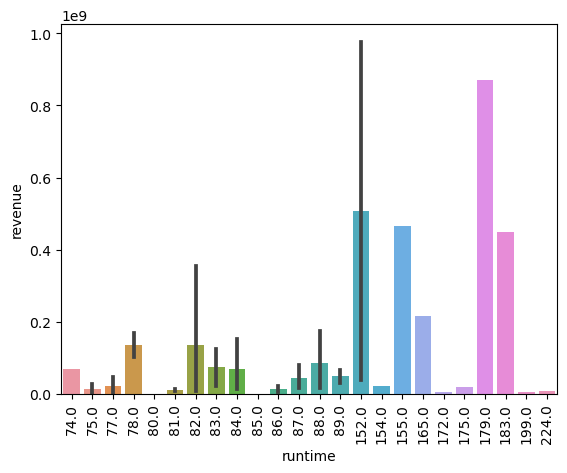

In [22]:
ax = sns.barplot(data=plot_df, x='runtime', y='revenue')
plt.xticks(rotation=90);

## Testing Assumptions
- No Significant Outliers
- Normality
- Equal Variance

### Checking Assumption of No Significant Outliers

In [23]:
long_group = two_more['revenue']
short_group = hour_half['revenue']
long_group

imdb_id
tt0172495    465361176.0
tt0187393    215294342.0
tt0222012      4900000.0
tt0245712     20908467.0
tt0120737    871368364.0
tt0169102      8100000.0
tt0213149    449220945.0
tt0241527    976475550.0
tt0249371     19000000.0
tt0268995     37317558.0
tt0285441      3786801.0
Name: revenue, dtype: float64

In [24]:
long_outliers = np.abs(stats.zscore(long_group)) > 3
long_outliers.sum()

0

In [25]:
short_outliers = np.abs(stats.zscore(short_group)) > 3
short_outliers.sum()

1

In [26]:
short_group = short_group.loc[~short_outliers]
short_group

imdb_id
tt0120467        14904.0
tt0120630    224834564.0
tt0120917    169327687.0
tt0131704     35134820.0
tt0138749     76432727.0
tt0144964     15843608.0
tt0156323      7201701.0
tt0175142    278019771.0
tt0177650       146193.0
tt0177888           27.0
tt0184907     62464731.0
tt0194218       779137.0
tt0196106            1.0
tt0199290      9000000.0
tt0204350         1404.0
tt0205461     19748009.0
tt0213203    103291131.0
tt0213790     13700000.0
tt0220099     45554533.0
tt0221889       313768.0
tt0234853            4.0
tt0235679     68411275.0
tt0239381       126783.0
tt0242423     73180723.0
tt0259974     16600000.0
tt0186589     13276953.0
tt0189192     16176732.0
tt0192111     13127022.0
tt0206367       628387.0
tt0218619      4299141.0
tt0219687        86000.0
tt0227538    147934180.0
tt0231775     71186502.0
tt0238948     31600000.0
tt0239395     93375151.0
tt0240462    176104344.0
tt0240515     14343028.0
tt0249478     54249294.0
tt0250282        28149.0
tt0250310     239

### Testing Normality

In [27]:
result = stats.normaltest(short_group)
result.pvalue

9.483481633959568e-07

In [28]:
len(short_group)

50

In [29]:
result = stats.normaltest(long_group)
result.pvalue

C:\Users\james\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.22408073632375955

In [30]:
len(long_group)

11

- We have small group samples and have failed to establish normalicy.

### Test for Equal Variances

In [31]:
result = stats.levene(short_group, long_group)
result

LeveneResult(statistic=19.847709456322598, pvalue=3.801522833551037e-05)

In [32]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We have failed to meet normal distribution AND have failed to meet the assumption of Equal Variances.
- Where we wanted to run a two-sample t-test we will need to run a Mann-Whitney U test instead.

## Final Hypothesis - Mann-Whitney U Test

In [35]:
result = stats.mannwhitneyu(short_group, long_group)
print(result)
result.pvalue<0.05

MannwhitneyuResult(statistic=179.0, pvalue=0.07321309948994098)


False

- We had a p_value < .05 for our Mann-Whitney U Test. We fail to reject the null hypothesis and support there is NOT a significant difference in the revenue based on the runtime of a movie.

# Question 3
- Do some movie genres earn more revenue than others?

## State the Hypothesis & Null Hypothesis
$H_0$ (Null Hypothesis): There is NOT a significant difference in the revenue based on the rating of a movie.  
$H_A$ (Alternative Hypothesis): There is a significant difference in the revenue based on the rating of a movie. 

## Determine the Correct Test to Perform

## Testing Assumptions
- No Significant Outliers
- Normality
- Equal Variance

### Checking Assumption of No Significant Outliers

### Checking Normality

### Test for Equal Variances

## Final Hypothesis - 